# Dataset 2

### Question 1

#### Load Boston Housing Dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing_data.csv', sep=',', header=None, names=["CRIM", "ZN", "INDUS", "CHAS",
                                                                  "NOX", "RM", "AGE", "DIS", "RAD",
                                                                  "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])


## index by column numbers
print("index by column numbers:\n", df.iloc[0:20, 0:14].head())
## index by column names:
print("index by column names: one column\n", df.loc[0:20, 'CRIM'].head())

index by column numbers:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
index by column names: one column
 0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: CRIM, dtype: float64


### Question 2

#### Fit a linear regression model

(a) Set MEDV as the target variable and the other attributes as the features and ordinary least squares as the penalty function

In [5]:
from sklearn import linear_model

X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

lr = linear_model.LinearRegression()

(b) Perfom a 10-fold cross validation and report the averaged RMSE

In [14]:
from sklearn import metrics
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

rmse_train = 0
rmse_test = 0

for trainset, testset in kf.split(X):
    X_train, y_train = X[trainset, :], y[trainset]
    X_test, y_test = X[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_i = np.sqrt(metrics.mean_squared_error(predicted_train, y_train))
    rmse_test_i = np.sqrt(metrics.mean_squared_error(predicted_test, y_test))
    
    rmse_train = rmse_train + rmse_train_i
    rmse_test = rmse_test + rmse_test_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_i)
    print("Test RMSE: ", rmse_test_i)
    
rmse_train = rmse_train / 10.0
rmse_test = rmse_test / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train)
print("Averaged Test RMSE: ", rmse_test)

--------------------
Train RMSE:  4.8335523617121865
Test RMSE:  3.0474492130107036
--------------------
Train RMSE:  4.78351694085294
Test RMSE:  3.76181912929218
--------------------
Train RMSE:  4.818306233036742
Test RMSE:  3.7514805283474
--------------------
Train RMSE:  4.557598345146193
Test RMSE:  5.933542308423654
--------------------
Train RMSE:  4.619028719706438
Test RMSE:  5.646690771105267
--------------------
Train RMSE:  4.729027367770045
Test RMSE:  4.453748753783647
--------------------
Train RMSE:  4.829826233518953
Test RMSE:  3.15392916564369
--------------------
Train RMSE:  3.4582072500374736
Test RMSE:  12.97595389720018
--------------------
Train RMSE:  4.646105398797536
Test RMSE:  5.773191930599386
--------------------
Train RMSE:  4.8155003289057445
Test RMSE:  3.31065109599653
--------------------
Averaged Train RMSE:  4.609066917948425
Averaged Test RMSE:  5.180845679340264


1) plot fitted values against true values as scatter plot using the whole dataset

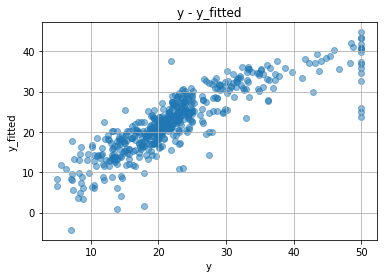

In [9]:
import matplotlib.pyplot as plt

y_fitted = lr.fit(X, y).predict(X)

plt.scatter(y, y_fitted, alpha=0.5)
plt.title("y - y_fitted")
plt.xlabel("y")
plt.ylabel("y_fitted")
plt.grid(True)
plt.show()

2) plot residuals versus fitted values as scatter plot using the whole dataset

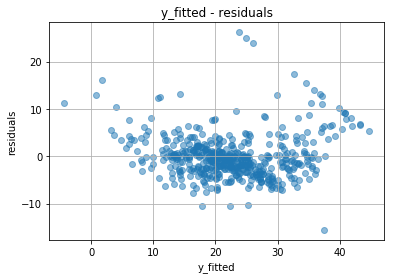

In [10]:
residuals = y - y_fitted

plt.scatter(y_fitted, residuals, alpha=0.5)
plt.title("y_fitted - residuals")
plt.xlabel("y_fitted")
plt.ylabel("residuals")
plt.grid(True)
plt.show()

### Question 3

(a) Perform one-hot encoding on all features, then fit and test. Report the train and test RMSE

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')
enc.fit(X)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [13]:
X_encoded = enc.transform(X).toarray()

In [16]:
kf = KFold(n_splits=10)

rmse_train_encoded = 0
rmse_test_encoded = 0

for trainset, testset in kf.split(X_encoded):
    X_train, y_train = X_encoded[trainset, :], y[trainset]
    X_test, y_test = X_encoded[testset, :], y[testset]
    lr.fit(X_train, y_train)
    
    predicted_train = lr.predict(X_train)
    predicted_test = lr.predict(X_test)
    
    rmse_train_encoded_i = np.sqrt(metrics.mean_squared_error(predicted_train, y_train))
    rmse_test_encoded_i = np.sqrt(metrics.mean_squared_error(predicted_test, y_test))
    
    rmse_train_encoded = rmse_train_encoded + rmse_train_encoded_i
    rmse_test_encoded = rmse_test_encoded + rmse_test_encoded_i
    
    print('-' * 20)
    print("Train RMSE: ", rmse_train_encoded_i)
    print("Test RMSE: ", rmse_test_encoded_i)
    
rmse_train_encoded = rmse_train_encoded / 10.0
rmse_test_encoded = rmse_test_encoded / 10.0

print('-' * 20)
print("Averaged Train RMSE: ", rmse_train_encoded)
print("Averaged Test RMSE: ", rmse_test_encoded)

--------------------
Train RMSE:  4.788059266329572e-14
Test RMSE:  6.987959176750142
--------------------
Train RMSE:  4.3818208891977834e-14
Test RMSE:  6.396855244905822
--------------------
Train RMSE:  4.0071504909314974e-14
Test RMSE:  5.5913172514291185
--------------------
Train RMSE:  3.2784876435438667e-14
Test RMSE:  12.396836881511408
--------------------
Train RMSE:  3.438105467473132e-14
Test RMSE:  10.377557618215244
--------------------
Train RMSE:  2.954358552546098e-14
Test RMSE:  9.605338772866071
--------------------
Train RMSE:  3.3224992393329077e-14
Test RMSE:  4.816854553193286
--------------------
Train RMSE:  2.8007130220988135e-14
Test RMSE:  11.973511550024627
--------------------
Train RMSE:  3.5737722858237607e-14
Test RMSE:  6.730780576141158
--------------------
Train RMSE:  3.056578717429423e-14
Test RMSE:  5.154426700189845
--------------------
Averaged Train RMSE:  3.5601545574706854e-14
Averaged Test RMSE:  8.003143832522671


(c) try different regularizations

1. Ridge Regularizer

In [23]:
from sklearn import linear_model

alphas = [x for x in np.arange(0.1, 1.0, 0.05)]

reg = linear_model.RidgeCV(alphas=alphas, cv=10)
reg.fit(X_encoded, y)
print("Best alpha found: ", reg.alpha_)

Best alpha found:  0.1


/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
lr_ridge = linear_model.Ridge(alpha=0.1)

rmse_train_ridge = 0
rmse_test_ridge = 0

for trainset, testset in kf.split(X_encoded):
    X_train, y_train = X_encoded[trainset, :], y[trainset]
    X_test, y_test = X_encoded[testset, :], y[testset]
    lr_ridge.fit(X_train, y_train)

    predicted_train = lr_ridge.predict(X_train)
    predicted_test = lr_ridge.predict(X_test)

    rmse_train_ridge = rmse_train_ridge + np.sqrt(metrics.mean_squared_error(predicted_train, y_train))
    rmse_test_ridge = rmse_test_ridge + np.sqrt(metrics.mean_squared_error(predicted_test, y_test))

rmse_train_ridge = rmse_train_ridge / 10.0
rmse_test_ridge = rmse_test_ridge / 10.0

print("Averaged Train RMSE: ", rmse_train_ridge)
print("Averaged Test RMSE: ", rmse_test_ridge)

Averaged Train RMSE:  0.0910103758003489
Averaged Test RMSE:  8.00442085716902


2. Lasso Regularizer

In [25]:
alphas = [x for x in np.arange(0.1, 1.0, 0.05)]

reg = linear_model.LassoCV(alphas=alphas, cv=10)
reg.fit(X_encoded, y)
print("Best alpha found: ", reg.alpha_)

Best alpha found:  0.1


In [26]:
lr_lasso = linear_model.Lasso(alpha=0.1)

rmse_train_lasso = 0
rmse_test_lasso = 0

for trainset, testset in kf.split(X_encoded):
    X_train, y_train = X_encoded[trainset, :], y[trainset]
    X_test, y_test = X_encoded[testset, :], y[testset]
    lr_lasso.fit(X_train, y_train)

    predicted_train = lr_lasso.predict(X_train)
    predicted_test = lr_lasso.predict(X_test)

    rmse_train_lasso = rmse_train_lasso + np.sqrt(metrics.mean_squared_error(predicted_train, y_train))
    rmse_test_lasso = rmse_test_lasso + np.sqrt(metrics.mean_squared_error(predicted_test, y_test))

rmse_train_lasso = rmse_train_lasso / 10.0
rmse_test_lasso = rmse_test_lasso / 10.0

print("Averaged Train RMSE: ", rmse_train_lasso)
print("Averaged Test RMSE: ", rmse_test_lasso)

Averaged Train RMSE:  6.240467370263949
Averaged Test RMSE:  8.200368237047693


3. Elastic Net Regularizer

In [28]:
l1_ratios = [0.1, 0.5, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99, 1.0]
alphas = [x for x in np.arange(0.1, 1.0, 0.05)]

reg = linear_model.ElasticNetCV(l1_ratio=l1_ratios, n_alphas=len(alphas), alphas=alphas, cv=10)
reg.fit(X_encoded, y)
print("Best alpha found: ", reg.alpha_)
print("Best l1 ratio found: ", reg.l1_ratio_)

Best alpha found:  0.1
Best l1 ratio found:  0.1


In [29]:
lr_elastic_net = linear_model.ElasticNet(l1_ratio=0.1, alpha=0.1)

rmse_train_en = 0
rmse_test_en = 0

for trainset, testset in kf.split(X_encoded):
    X_train, y_train = X_encoded[trainset, :], y[trainset]
    X_test, y_test = X_encoded[testset, :], y[testset]
    lr_elastic_net.fit(X_train, y_train)

    predicted_train = lr_elastic_net.predict(X_train)
    predicted_test = lr_elastic_net.predict(X_test)

    rmse_train_en = rmse_train_en + np.sqrt(metrics.mean_squared_error(predicted_train, y_train))
    rmse_test_en = rmse_test_en + np.sqrt(metrics.mean_squared_error(predicted_test, y_test))

rmse_train_en = rmse_train_en / 10.0
rmse_test_en = rmse_test_en / 10.0

print("Averaged Train RMSE: ", rmse_train_en)
print("Averaged Test RMSE: ", rmse_test_en)

Averaged Train RMSE:  6.15734337709661
Averaged Test RMSE:  8.105309661930113
